同一图像的不同分辨率的子图集合， 我们把最大的图像放在底部，最小的放在顶部，看起来就像一座金字塔。

# Gaussian Pyramid 高斯金字塔cv2.pyrDown()和cv2.pyrUp()
高斯金字塔的顶部是通过将底部图像中的连续的行和列去除得到的。顶部图像中的每个像素值等于下一层图像中5个像素的高斯加权平均值。这样操作一次一个MxN的图像就变成了一个M/2xN/2的图像。所以这幅图像的面积就变为原来图像面积的四分之一。这被称为Octave。连续这样的操作，我们就会得到一个分辨率不断下降的图像金字塔。可以使用函数cv2.pyrDown()和cv2.pyrUp()构建图像金字塔。
cv2.pyrDown从一个高分辨率大尺寸的图像向上构建一个金字塔（尺寸变小，分辨率降低）

In [1]:
import cv2
import numpy as np
img = cv2.imread('messi1.jpg')

# cv2.pyrDown从一个高分辨率大尺寸的图像向上构建一个金字塔
#（尺寸变小，分辨率降低）
lower_reso = cv2.pyrDown(img)

#cv2.pyrUp从一个低分辨率小尺寸的图像向上构建一个金字塔（尺寸变大，但分辨率不会增加）
higher_reso2 = cv2.pyrUp(lower_reso)
# 尺寸变大后的 lower_zeso 不等于 原图，因为分辨率损失

while(1):
    cv2.imshow('img',img)
    cv2.imshow('lower_reso',lower_reso)
    cv2.imshow('higher_reso2',higher_reso2)
    if cv2.waitKey() == ord('q'):
        break
cv2.destroyAllWindows()

## 拉普拉斯金字塔 Laplacian Pyramids 
拉普拉斯金字塔由高斯金字塔形成。没有专用功能。拉普拉斯金字塔图像仅像边缘图像。它的大多数元素为零。它们用于图像压缩。拉普拉斯金字塔的层由高斯金字塔的层与高斯金字塔的高层的扩展版本之间的差形成。
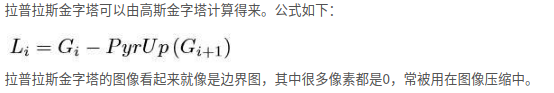

# 金字塔图像融合
1. 加载不同图片

2. 找到个图片的高斯金字塔

3. 进而找到拉普拉斯金字塔

4. 合并

In [2]:
import cv2
import numpy as np,sys

A = cv2.imread('apple0.jpg')
B = cv2.imread('orange0.jpg')

# generate Gaussian pyramid for A
G = A.copy()
gpA = [G]
for i in range(6):
    G = cv2.pyrDown(G)
    gpA.append(G)

# generate Gaussian pyramid for B
G = B.copy()
gpB = [G]
for i in range(6):
    G = cv2.pyrDown(G)
    gpB.append(G)

# generate Laplacian Pyramid for A
lpA = [gpA[5]]
for i in range(5,0,-1):
    GE = cv2.pyrUp(gpA[i])
    L = cv2.subtract(gpA[i-1],GE)
    lpA.append(L)

# generate Laplacian Pyramid for B
lpB = [gpB[5]]
for i in range(5,0,-1):
    GE = cv2.pyrUp(gpB[i])
    L = cv2.subtract(gpB[i-1],GE)
    lpB.append(L)

# Now add left and right halves of images in each level
LS = []
for la,lb in zip(lpA,lpB):
    rows,cols,dpt = la.shape
    ls = np.hstack((la[:,0:cols//2], lb[:,cols//2:]))
    LS.append(ls)

# now reconstruct
ls_ = LS[0]
for i in range(1,6):
    ls_ = cv2.pyrUp(ls_)
    ls_ = cv2.add(ls_, LS[i])

# image with direct connecting each half
real = np.hstack((A[:,:cols//2],B[:,cols//2:]))

cv2.imshow('Pyramid_blending2',ls_)
cv2.imshow('Direct_blending',real)
cv2.waitKey(0)&0xFF == 27
cv2.destroyAllWindows()



cv2.imwrite('Pyramid_blending2.jpg',ls_)
cv2.imwrite('Direct_blending.jpg',real)

True

### TypeError: slice indices must be integers or None or have an __index__ method
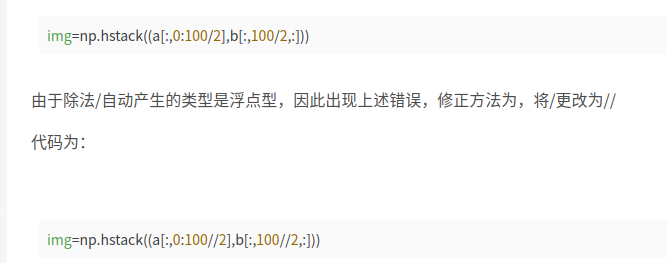